In [50]:
# %load exploratory_behavior_2hand.py


#!/usr/bin/env python2
# -*- coding: utf-8 -*-
"""
Created on Mon Aug 13 11:53:01 2018

@author: stiso
"""

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

# read data
top_dir = '/Users/stiso/Documents/Code/graph_learning/ECoG_data/'
subj = '18'
HUPID = '206'
data_raw = pd.read_csv("".join((top_dir, 'behavioral_data_raw/HUP', HUPID, '_typingtask/subj', subj, '_log_motor_run1.csv')))
# load all sessions

ext = []
for sess in ext:
    curr_sess = pd.read_csv("".join((top_dir, 'behavioral_data_raw/HUP', HUPID, '_typingtask/subj', subj, '_log_motor_run', sess, '.csv')))
    data_raw = pd.concat([data_raw, curr_sess])
    
save_dir = "".join((top_dir, 'behavioral_data_raw/subj', subj, '/'))
if not os.path.exists(save_dir):
    os.mkdir(save_dir)
data = data_raw
data["graph"][1]

'modular'

In [51]:
# add block
data['block'] = data['trialNum']
for index, row in data.iterrows():
    if row['trialNum'] < 251:
        data.loc[index,'block'] = 1
    elif row['trialNum'] > 250 and row['trialNum'] < 501:
        data.loc[index,'block'] = 2
    elif row['trialNum'] > 500 and row['trialNum'] < 751:
        data.loc[index,'block'] = 3
    elif row['trialNum'] > 750:
        data.loc[index,'block'] = 4
           
data.tail()

,sess,graph,trialNum,resp,path,pID,walk,ISI_raw,correct_raw,onset_raw,resp_raw,rt_raw,typing_raw,order,block
998,1,modular,999.0,o,img/target_9.png,18.0,5.0,0.05,1.0,975.663696,['o'],0.657892,d,998.0,4.0
999,1,modular,1000.0,u,img/target_7.png,18.0,6.0,0.05,1.0,976.414185,['u'],0.603374,d,999.0,4.0
1000,extraInfo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1001,START,1.59740447998e-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1002,END,977.10805583,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [52]:
# add session if its not there
try:
    data['sess']
except:
    data['sess'] = 1
        

In [53]:
data.head()

,sess,graph,trialNum,resp,path,pID,walk,ISI_raw,correct_raw,onset_raw,resp_raw,rt_raw,typing_raw,order,block
0,1,modular,1.0,q,img/target_1.png,18.0,9.0,0.05,1.0,0.009820,['q'],1.161998,d,0.0,1.0
1,1,modular,2.0,r,img/target_4.png,18.0,0.0,0.05,1.0,1.272605,['r'],0.882769,d,1.0,1.0
2,1,modular,3.0,v,img/target_5.png,18.0,1.0,0.05,1.0,2.258539,['v'],1.232828,d,2.0,1.0
3,1,modular,4.0,b,img/target_6.png,18.0,3.0,0.05,1.0,3.592044,['b'],0.603363,d,3.0,1.0
4,1,modular,5.0,r,img/target_4.png,18.0,0.0,0.05,1.0,4.285391,['r'],0.622179,d,4.0,1.0


In [54]:
# Basic preprocessing

data.dropna(inplace=True)

# get cutoff threshold - 2 std's above
cutoff = 2.*data["rt_raw"].std() + data["rt_raw"].mean()
print(cutoff)

accuracy = (sum(data["correct_raw"] == 1)*100)/data["correct_raw"].count()
print(accuracy)


2.1215314257071816
92.6


In [55]:
import scipy.io as sio

# save variables that you need for ECoG data - correct, outside of cutoff, walk, trial
walk = data['walk'].values
trial = data['order'].values + 1
cutoff = (data['rt_raw'] > 0.050).values & (data['rt_raw'] < cutoff).values
correct = data['correct_raw'].values

sio.savemat("".join([top_dir, 'ephys_raw/', subj, '/task_data.mat']), {'walk':walk, 'trial':trial, 'cutoff':cutoff, 'correct':correct})
cutoff


array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True, False,  True,  True,  True, False,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True, False, False,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True, False,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True, False,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True, False,  True, False,  True,  True,  True,
        True,  True,  True,  True,  True, False,  True,  True,  True,
        True, False,  True,  True,  True,  True,  True,  True,  True,
        True, False,

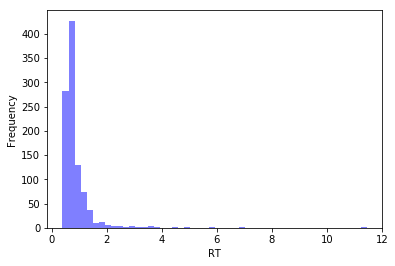

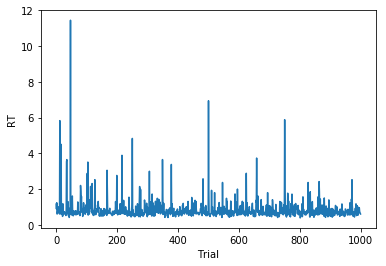

In [56]:
%matplotlib inline

# plot
num_bins = 50
fig = plt.figure()
# the histogram of the data
plot_data = data.rt_raw.tolist()
n, bins, patches = plt.hist(plot_data, num_bins, facecolor='blue', alpha=0.5)
plt.xlabel('RT')
plt.ylabel('Frequency')
fig.savefig("".join([save_dir, 'subj', subj, '_rt_hist.png']))

fig = plt.figure()
plt.plot(plot_data)
plt.xlabel('Trial')
plt.ylabel('RT')
fig.savefig("".join([save_dir, 'subj', subj, '_rt.png']))

#%% Get transition data

transitions = [0,9,4,5]
#transitions = [1,2,7,8]
trans_idx = [False]
tmp = data.walk.tolist()
for i,n in enumerate(data.walk.tolist()):
    if i > 0:
        if n in transitions and tmp[i-1] in transitions:
            trans_idx.append(True)
        else:
            trans_idx.append(False)
    
    


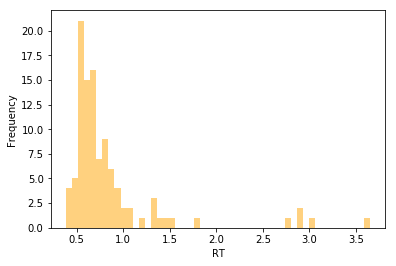

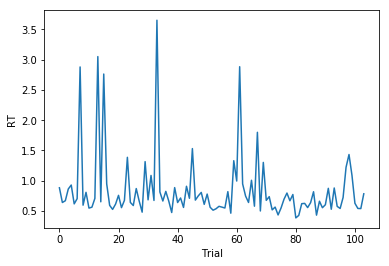

In [57]:
transition_data = data.loc[trans_idx]

# append transition to data
data['transition'] = trans_idx
data['transition'] = data['transition'].astype('category')

# plot
num_bins = 50
fig = plt.figure()
# the histogram of the data
plot_data = transition_data.rt_raw.tolist()
n, bins, patches = plt.hist(plot_data, num_bins, facecolor='orange', alpha=0.5)
plt.xlabel('RT')
plt.ylabel('Frequency')
fig.savefig("".join([save_dir, 'subj', subj, '_rt_hist_trans.png']))

fig = plt.figure()
plt.plot(plot_data)
plt.xlabel('Trial')
plt.ylabel('RT')
fig.savefig("".join([save_dir, 'subj', subj, '_rt_trans.png']))




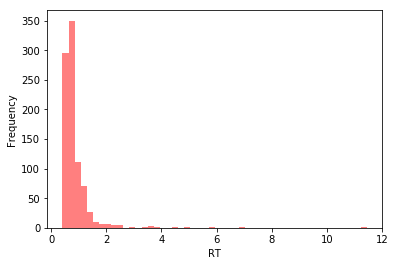

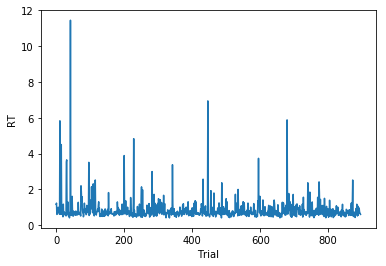

In [58]:
#%% Not transition data   
within_data = data[data["transition"] == 0]

# plot
num_bins = 50
fig = plt.figure()
# the histogram of the data
plot_data = within_data.rt_raw.tolist()
n, bins, patches = plt.hist(plot_data, num_bins, facecolor='red', alpha=0.5)
plt.xlabel('RT')
plt.ylabel('Frequency')
fig.savefig("".join([save_dir, 'subj', subj, '_rt_hist_within.png']))

fig = plt.figure()
plt.plot(plot_data)
plt.xlabel('Trial')
plt.ylabel('RT')
fig.savefig("".join([save_dir, 'subj', subj, '_rt_within.png']))




In [59]:
#%% Summary stats

print(transition_data.rt_raw.mean())
print(within_data.rt_raw.mean())
print(data.rt_raw.mean())



0.8459001573232504
0.8491681745009763
0.8488283007144928


In [60]:
# make predictors for recency and priming, according to karuza paper
# lag10
lag = 10
walk = data.walk.astype(float)
walk = walk.tolist()
# append zeros to the beginning
for i in range(lag):
   walk.insert(0,np.nan)
lag10 = [];
for i,n in enumerate(walk):
    if i > 9:
        curr = walk[(i-10):(i-1)]
        lag10.append(curr.count(n))
    
# recency
walk = data.walk.astype(float)
walk = walk.tolist()
recency = [np.nan]
for i,n in enumerate(walk):
    if i > 0:
        curr = walk[0:(i-1)]
        if n in curr:
            idx = i - max(loc for loc, val in enumerate(curr) if val == n)
        else:
            idx = np.nan
        recency.append(idx)
        


# hand transition index
left = ['q', 'w', 'e', 'r', 'v']
right = ['b', 'u', 'i', 'o', 'p']
hand = []
hand_transition = [False]
for i,key in enumerate(data.resp):
    if key in left:
        hand.append('left')
    elif key in right:
        hand.append('right')
    else:
        hand.append(np.nan)
        
    if i > 0:
        if len(hand) == 0:
            hand_transition.append(False)
        elif hand[i] != hand[i-1]:
            hand_transition.append(True)
        else:
            hand_transition.append(False)
            




In [61]:
#%%
            
import statsmodels.api as sm

data['lag10'] = lag10
data['order'] = (data['order'] + 1) # not taking log
data['recency'] = recency
data['resp'] = data['resp'].astype('category')
data['hand'] = hand
data['hand_transition'] = hand_transition
data['hand'] = data['hand'].astype('category')
data['hand_transition'] = data['hand_transition'].astype('category')

# accuracy
print(np.mean(data.correct_raw[data.transition == 1]))
print(np.mean(data.correct_raw[data.transition == 0]))

# cut down to only relevant fields
# get only correct responses, that are within 2 std
data = data[data.correct_raw == 1 & cutoff]
data = data.dropna(how='any')

# convert to float
data.rt_raw = data.rt_raw.apply(float)


model_data = data.dropna(how='any')
#model_data = model_data[model_data.trialNum >600] # if you want to look after they have learned
Y = model_data["rt_raw"]
X = model_data[["transition", "lag10", "recency", "order", "resp", "hand_transition", "block", 'sess']]
X = sm.add_constant(X)
X["resp"].cat.categories = [1,2,3,4,5,6,7,8,9,10]
#X["hand"].cat.categories = [1,2]



0.9134615384615384
0.9274553571428571


In [62]:
model_data.to_csv("".join([save_dir, 'subj', subj, '_clean_data']))

# Note the difference in argument order
model = sm.OLS(Y, X.astype(float)).fit()
#predictions = model.predict(X) # make the predictions by the model


#%% Print out the statistics
model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 rt_raw   R-squared:                       0.068
Model:                            OLS   Adj. R-squared:                  0.060
Method:                 Least Squares   F-statistic:                     9.522
Date:                Wed, 21 Oct 2020   Prob (F-statistic):           1.87e-11
Time:                        09:11:25   Log-Likelihood:                -710.99
No. Observations:                 928   AIC:                             1438.
Df Residuals:                     920   BIC:                             1477.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.3960      0.037     10.728      0.000       0.324       0.468
transition          0.0404      0.060      0.669      0.504      -0.078       0.159
lag10              -0.0629      0.020     -3.135      0.002      -0.102      -0.024
recency             0.0057      0.002      3.295      0.001       0.002       0.009
order              -0.0006      0.000     -2.280      0.023      -0.001   -7.69e-05
resp                0.0025      0.006      0.415      0.678      -0.009       0.014
hand_transition     0.0904      0.037      2.467      0.014       0.018       0.162
block               0.0988      0.062      1.587      0.113      -0.023       0.221
sess                0.3960      0.037     10.728      0.000       0.324       0.468
==============================================================================
Omnibus:                     1582.858   Durbin-Watson:                   2.008
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1324073.967
Skew:                          10.837   Prob(JB):                         0.00
Kurtosis:                     186.776   Cond. No.                     1.70e+17
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.08e-26. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [63]:
#%% Check for colinearity

#from libraries.settings import *
from scipy.stats.stats import pearsonr
import itertools

correlations = {}
columns = X.columns.tolist()

for col_a, col_b in itertools.combinations(columns, 2):
    correlations[col_a + '__' + col_b] = pearsonr(X.loc[:, col_a], X.loc[:, col_b])

result = pd.DataFrame.from_dict(correlations, orient='index')
result.columns = ['PCC', 'p-value'] 

print(result)


                                  PCC       p-value
const__transition                 NaN           NaN
const__lag10                      NaN           NaN
const__recency                    NaN           NaN
const__order                      NaN           NaN
const__resp                       NaN           NaN
const__hand_transition            NaN           NaN
const__block                      NaN           NaN
const__sess                       NaN           NaN
transition__lag10           -0.183490  1.801920e-08
transition__recency          0.141260  1.566625e-05
transition__order            0.033283  3.111532e-01
transition__resp             0.024646  4.533229e-01
transition__hand_transition -0.347339  1.053256e-27
transition__block            0.029323  3.722553e-01
transition__sess                  NaN           NaN
lag10__recency              -0.599464  1.268442e-91
lag10__order                -0.012098  7.128394e-01
lag10__resp                  0.019023  5.627467e-01
lag10__hand_

/Users/stiso/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:3399: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())


In [64]:
transitions = [0,9,4,5]
#transitions = [1,2,7,8]
trans_idx = [0]
tmp = data.walk.tolist()
for i,n in enumerate(data.walk.tolist()):
    if i > 0:
        if n in transitions and tmp[i-1] in transitions:
            trans_idx.append(1)
        else:
            trans_idx.append(0)

data['transition'] = trans_idx
print(data["transition"])
data.to_csv("".join([save_dir, 'subj', subj, '_trans.csv']))


4      0
6      1
7      0
8      0
9      0
10     0
11     0
12     0
13     0
14     0
16     0
17     0
18     0
19     0
20     0
21     0
22     0
23     0
25     1
26     0
27     0
28     0
29     0
30     0
31     0
32     0
36     1
37     0
38     0
40     0
      ..
967    0
971    1
972    1
973    0
974    0
975    0
976    0
977    0
978    0
979    0
980    0
981    0
982    0
983    0
984    0
985    0
986    0
987    1
988    0
989    0
990    1
991    1
992    0
993    0
994    1
995    0
996    0
997    0
998    0
999    0
Name: transition, Length: 928, dtype: int64
